In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import re
import string
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV



# Accessing the cleaned Dataset

In [2]:
df=pd.read_csv('/Users/aryajeshkumar/Desktop/project2020/data.csv')
df.shape

(50000, 2)

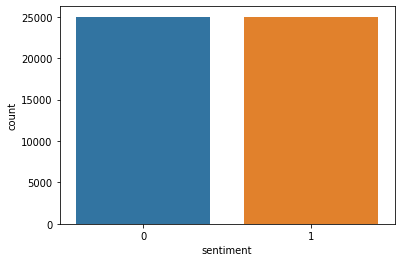

In [3]:
import seaborn as sns

sns.countplot(x='sentiment', data=df)

In [4]:
df.head()
df["review"][3]


'see movie care movie anyhow would think go paris like country national capital like learn french anyhow understand language would go france rather go germany united kingdom germany united kingdom nation tolerate apparently olsen twin understand french language like therefore bother france trip matter might well stick united kingdom meet single woman play video game video arcade'

In [5]:
X = []
sentences = list(df['review'])
for sen in sentences:
    X.append((sen))
y = df['sentiment']
X[3]


'see movie care movie anyhow would think go paris like country national capital like learn french anyhow understand language would go france rather go germany united kingdom germany united kingdom nation tolerate apparently olsen twin understand french language like therefore bother france trip matter might well stick united kingdom meet single woman play video game video arcade'

# Vectorization

In [6]:
vectorizer = TfidfVectorizer(min_df=30,
                             strip_accents = None,
                             lowercase = False,
                             preprocessor = None,
                             use_idf = True,
                             norm = 'l2',
                             smooth_idf = True)
bow = vectorizer.fit_transform(df['review'])
labels = df['sentiment']
#print(bow)

In [7]:
with open('vectorizer.pkl', 'wb') as f:
    joblib.dump(vectorizer, f)

In [8]:
len(vectorizer.get_feature_names())


11040

# Splitting the Dataset: The Train and Test Sets

In [9]:
x_train,x_test,y_train,y_test=train_test_split(bow,labels,
                                               random_state=1,
                                              test_size=0.33,
                                              shuffle = True)
x_train.shape

(33500, 11040)

In [10]:
x_test.shape

(16500, 11040)

# Logistic Regression Classifier

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Best cross-validation score: 0.88
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
from sklearn.externals import joblib

clf=LogisticRegressionCV(solver='lbfgs',cv=5,
                        scoring = 'accuracy',
                        random_state=None,
                        n_jobs=-1,
                        verbose=3).fit(x_train,y_train)
with open('sentiment_classifier.pkl', 'wb') as f:
    joblib.dump(clf, f)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.1s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished


# Accuracy 

In [13]:
clf.score(x_test,y_test)

0.8882424242424243

In [14]:
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[7323, 1032],
       [ 812, 7333]])

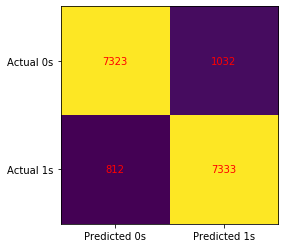

In [15]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred) 

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# SVM Classifier & Accuracy

In [16]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc.score(x_test,y_test)

0.8786060606060606

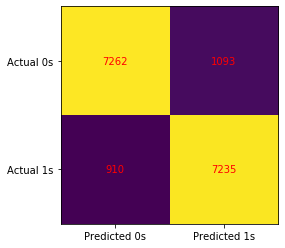

In [17]:
y_pred = svc.predict(x_test)
confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred) 

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Decision Tree Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier as rfc

classifier = rfc()
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.8482424242424242

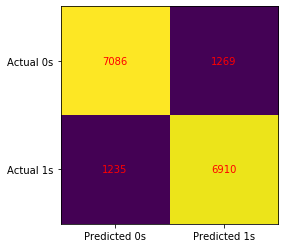

In [23]:
y_pred = classifier.predict(x_test)
confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred) 

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Making Prediction for a single instance 

In [19]:
root = '/Users/aryajeshkumar/Desktop/project2020/test'
filename = 'index.txt'
file = open(root+ '/' +filename, 'r')
text = file.read()
print(text)

"All the world's a stage and its people actors in it"--or something like that. Who the hell said that theatre stopped at the orchestra pit--or even at the theatre door? Why is not the audience participants in the theatrical experience, including the story itself?<br /><br />This film was a grand experiment that said: "Hey! the story is you and it needs more than your attention, it needs your active participation". "Sometimes we bring the story to you, sometimes you have to go to the story."<br /><br />Alas no one listened, but that does not mean it should not have been said.


In [20]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence.lower())
    
    # stopwords removal
    sentence = stop_words(sentence)
    
    # lemmatization 
    sentence = lemmatize_words(sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def stop_words(text):
    filtered_sentence = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if w not in stopwords.words('english') and w.isalpha():
            filtered_sentence.append(w)
            str1=' '.join(str(e) for e in filtered_sentence)
    return str1

def lemmatize_words(text):
    tokens = nltk.word_tokenize(text)
    lmtzr = WordNetLemmatizer()
    tagged=nltk.pos_tag(tokens)
    filtered_sentence = []
    for token, tag in tagged:
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        filtered_sentence.append(lemma)
        str2=' '.join(str(e) for e in filtered_sentence)
    return str2 


In [21]:
instance = preprocess_text(text)
print(instance)

world stage people actor something like hell say theatre stop orchestra pit even theatre door audience participant theatrical experience include story film grand experiment say hey story need attention need active participation sometimes bring story sometimes go story alas one listen mean say


In [22]:
threshold = 0.5
clf.fit(bow,labels)

trial_review = vectorizer.transform([instance])

sentence = vectorizer.transform(['i hate you'])

prob = clf.predict_proba(sentence)
#prob = clf.predict_proba(trial_review)

prob = clf.predict(sentence)
print(prob)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.0s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.6s finished


[1]
